In [ ]:
# A brief of dataset

In [ ]:
'''
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type
(discrete 7 values)
Attribute Information:

Id number: 1 to 214 (removed from CSV file)
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute) -- 1 building_windows_float_processed -- 2 building_windows_non_float_processed -- 
3 vehicle_windows_float_processed -- 4 vehicle_windows_non_float_processed (none in this database) -- 5 containers -- 
6 tableware -- 7 headlamps
'''

In [ ]:
# Importing reqiured libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

In [ ]:
# loading dataset

In [2]:
gs=pd.read_csv("C://Users//acer//Desktop//1sem//python//glass//glass.csv")

In [ ]:
# first few rows

In [3]:
gs.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
# last few rows

In [4]:
gs.tail(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
211,1.52065,14.36,0.0,2.02,73.42,0.0,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,7


In [ ]:
# all col names

In [5]:
gs.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [ ]:
# renaming all column in lower case

In [6]:
gs.columns=map(str.lower,gs.columns)

In [ ]:
# Listing all col datatype

In [7]:
gs.dtypes

ri      float64
na      float64
mg      float64
al      float64
si      float64
k       float64
ca      float64
ba      float64
fe      float64
type      int64
dtype: object

In [ ]:
# null values

In [8]:
gs.isna().sum()

ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

In [ ]:
# Data visualization

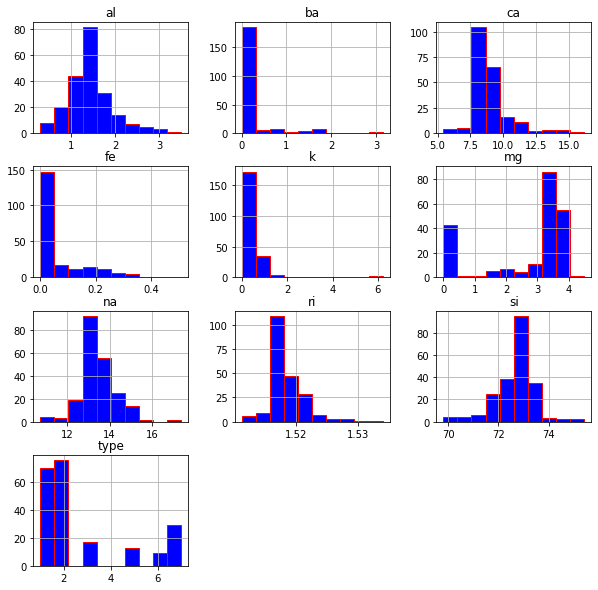

In [10]:
gs.hist(figsize=(10,10),color="blue",edgecolor="red")
plt.show()

In [ ]:
# using countplot

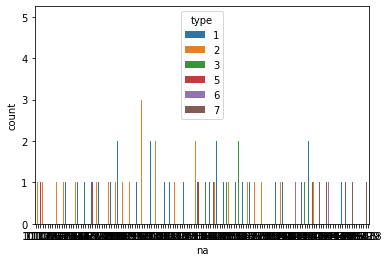

In [13]:
sns.countplot(x="na",hue="type",data=gs)

In [ ]:
# using scatter plot

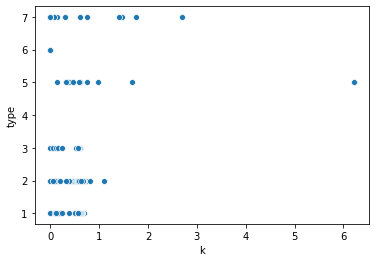

In [14]:
sns.scatterplot(x="k",y="type",data=gs)

In [ ]:
# heat map

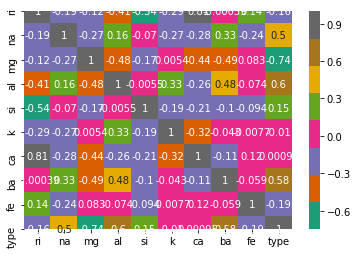

In [15]:
gs_corr=gs.corr()
sns.heatmap(gs_corr,annot=True,cmap="Dark2")

In [ ]:
# dividing dataset into dependent and independent variables

In [16]:
y=gs["type"]
x=gs.drop("type",axis=1)

In [ ]:
# Looking at feature importance

In [17]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.13470445 0.09546856 0.17920303 0.1458733  0.08142227 0.10277673
 0.11900814 0.08201911 0.05952442]


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


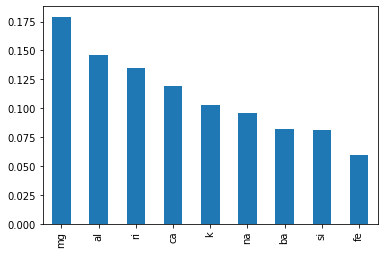

In [18]:
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind="bar")
plt.show()

In [ ]:
# using chi2

In [29]:
bestfeats=SelectKBest(score_func=chi2,k=9)
fit=bestfeats.fit(x,y)
dfscore=pd.DataFrame(fit.scores_)
dfcol=pd.DataFrame(x.columns)
featscore=pd.concat([dfscore,dfcol],axis=1)
featscore.columns=["score","features"]

In [39]:
featscore.nlargest(9,"score")

,score,features
7,145.514077,ba
2,100.984212,mg
5,31.670632,k
3,16.977488,al
1,4.311253,na
6,3.210929,ca
8,2.170185,fe
4,0.110449,si
0,0.000048,ri


In [ ]:
# splitting into training and test split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# printing the shape of datatset

In [41]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (149, 9)
shape of y_train is: (149,)
shape of x_test is: (65, 9)
shape of y_test is: (65,)


In [ ]:
# applying ml algo

In [ ]:
# using lda

In [42]:
lda=LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
prediction=lda.predict(x_test)

In [43]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          2
..   ...        ...
5      1          2
135    2          2
56     1          3
199    7          7
173    5          3

[65 rows x 2 columns]


In [ ]:
# evaluating result

In [49]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
# print("Sensitiviy is :",recall_score(y_test, prediction))
# print("Precision is :",precision_score(y_test, prediction))
# print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.6461538461538462
Kappa is : 0.5246422893481717
array([[16,  2,  1,  0,  0,  0],
       [ 6, 15,  1,  0,  1,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 0,  2,  1,  1,  2,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 1,  0,  0,  0,  1,  8]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.62      0.84      0.71        19\n'
 '           2       0.75      0.65      0.70        23\n'
 '           3       0.00      0.00      0.00         4\n'
 '           5       1.00      0.17      0.29         6\n'
 '           6       0.33      0.67      0.44         3\n'
 '           7       0.89      0.80      0.84        10\n'
 '\n'
 '    accuracy                           0.65        65\n'
 '   macro avg       0.60      0.52      0.50        65\n'
 'weighted avg       0.69      0.65      0.63        65\n')


In [ ]:
# using log reg

In [51]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [52]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          2
..   ...        ...
5      1          2
135    2          1
56     1          1
199    7          7
173    5          2

[65 rows x 2 columns]


In [55]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.6461538461538462
Kappa is : 0.5029920212765957
Sensitiviy is : 0.6461538461538462
Precision is : 0.6461538461538462
R2 score is: 0.6516129032258065
array([[15,  4,  0,  0,  0,  0],
       [ 6, 16,  0,  0,  0,  1],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  5,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.65      0.79      0.71        19\n'
 '           2       0.57      0.70      0.63        23\n'
 '           3       0.00      0.00      0.00         4\n'
 '           5       1.00      0.17      0.29         6\n'
 '           6       0.00      0.00      0.00         3\n'
 '           7       0.77      1.00      0.87        10\n'
 '\n'
 '    accuracy                           0.65        65\n'
 '   macro avg       0.50      0.44      0.42        65\n'
 'weighted avg       0.60      0.65      0.59        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# using qda

In [58]:
qda=QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
prediction=qda.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:717: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\discriminant_analysis.py:720: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [59]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          3
197    7          3
66     1          3
191    7          3
117    2          3
..   ...        ...
5      1          3
135    2          3
56     1          3
199    7          3
173    5          3

[65 rows x 2 columns]


In [60]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.06153846153846154
Kappa is : 0.0
Sensitiviy is : 0.06153846153846154
Precision is : 0.06153846153846154
R2 score is: 0.0
array([[ 0,  0, 19,  0,  0,  0],
       [ 0,  0, 23,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.00      0.00      0.00        19\n'
 '           2       0.00      0.00      0.00        23\n'
 '           3       0.06      1.00      0.12         4\n'
 '           5       0.00      0.00      0.00         6\n'
 '           6       0.00      0.00      0.00         3\n'
 '           7       0.00      0.00      0.00        10\n'
 '\n'
 '    accuracy                           0.06        65\n'
 '   macro avg       0.01      0.17      0.02        65\n'
 'weighted avg       0.00      0.06      0.01        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# dt

In [61]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [62]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          2
..   ...        ...
5      1          2
135    2          1
56     1          3
199    7          7
173    5          5

[65 rows x 2 columns]


In [65]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.7384615384615385
Kappa is : 0.6585290482076638
Sensitiviy is : 0.7384615384615385
Precision is : 0.7384615384615385
R2 score is: 0.42903225806451617
array([[16,  1,  1,  0,  0,  1],
       [ 7, 12,  0,  0,  1,  3],
       [ 1,  0,  3,  0,  0,  0],
       [ 0,  1,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  1,  0,  0,  0,  9]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.67      0.84      0.74        19\n'
 '           2       0.80      0.52      0.63        23\n'
 '           3       0.75      0.75      0.75         4\n'
 '           5       1.00      0.83      0.91         6\n'
 '           6       0.75      1.00      0.86         3\n'
 '           7       0.69      0.90      0.78        10\n'
 '\n'
 '    accuracy                           0.74        65\n'
 '   macro avg       0.78      0.81      0.78        65\n'
 'weighted avg       0.76      0.74      0.73        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
# random forest

In [66]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [67]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          2
..   ...        ...
5      1          2
135    2          2
56     1          1
199    7          7
173    5          2

[65 rows x 2 columns]


In [68]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.7538461538461538
Kappa is : 0.668261562998405
Sensitiviy is : 0.7538461538461538
Precision is : 0.7538461538461538
R2 score is: 0.8161290322580645
array([[17,  2,  0,  0,  0,  0],
       [ 4, 16,  1,  2,  0,  0],
       [ 2,  2,  0,  0,  0,  0],
       [ 0,  2,  1,  3,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.74      0.89      0.81        19\n'
 '           2       0.73      0.70      0.71        23\n'
 '           3       0.00      0.00      0.00         4\n'
 '           5       0.60      0.50      0.55         6\n'
 '           6       1.00      1.00      1.00         3\n'
 '           7       1.00      1.00      1.00        10\n'
 '\n'
 '    accuracy                           0.75        65\n'
 '   macro avg       0.68      0.68      0.68        65\n'
 'weighted avg       0.73      0.75      0.74        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [69]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [70]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          2
..   ...        ...
5      1          2
135    2          2
56     1          1
199    7          7
173    5          2

[65 rows x 2 columns]


In [71]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.5846153846153846
Kappa is : 0.4327731092436974
Sensitiviy is : 0.5846153846153846
Precision is : 0.5846153846153846
R2 score is: 0.44516129032258067
array([[16,  2,  1,  0,  0,  0],
       [ 7, 13,  1,  0,  2,  0],
       [ 4,  0,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  1,  8]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.55      0.84      0.67        19\n'
 '           2       0.65      0.57      0.60        23\n'
 '           3       0.00      0.00      0.00         4\n'
 '           5       0.00      0.00      0.00         6\n'
 '           6       0.25      0.33      0.29         3\n'
 '           7       0.80      0.80      0.80        10\n'
 '\n'
 '    accuracy                           0.58        65\n'
 '   macro avg       0.38      0.42      0.39        65\n'
 'weighted avg       0.53      0.58      0.55        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
svc=SVC()
svc.fit(x_train,y_train)
prediction=svc.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [73]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          2
..   ...        ...
5      1          2
135    2          2
56     1          1
199    7          7
173    5          2

[65 rows x 2 columns]


In [74]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.6461538461538462
Kappa is : 0.5123939986953685
Sensitiviy is : 0.6461538461538462
Precision is : 0.6461538461538462
R2 score is: 0.7
array([[17,  2,  0,  0,  0,  0],
       [11, 12,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 1,  2,  0,  3,  0,  0],
       [ 0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  9]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.53      0.89      0.67        19\n'
 '           2       0.63      0.52      0.57        23\n'
 '           3       0.00      0.00      0.00         4\n'
 '           5       1.00      0.50      0.67         6\n'
 '           6       0.50      0.33      0.40         3\n'
 '           7       1.00      0.90      0.95        10\n'
 '\n'
 '    accuracy                           0.65        65\n'
 '   macro avg       0.61      0.52      0.54        65\n'
 'weighted avg       0.65      0.65      0.62        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)

In [77]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          2
..   ...        ...
5      1          2
135    2          2
56     1          1
199    7          7
173    5          2

[65 rows x 2 columns]


In [78]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.7846153846153846
Kappa is : 0.7097288676236044
Sensitiviy is : 0.7846153846153846
Precision is : 0.7846153846153846
R2 score is: 0.7193548387096774
array([[16,  2,  0,  0,  0,  1],
       [ 5, 17,  0,  0,  0,  1],
       [ 2,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.70      0.84      0.76        19\n'
 '           2       0.81      0.74      0.77        23\n'
 '           3       1.00      0.25      0.40         4\n'
 '           5       1.00      0.83      0.91         6\n'
 '           6       1.00      0.67      0.80         3\n'
 '           7       0.77      1.00      0.87        10\n'
 '\n'
 '    accuracy                           0.78        65\n'
 '   macro avg       0.88      0.72      0.75        65\n'
 'weighted avg       0.81      0.78      0.78        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [79]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          2
..   ...        ...
5      1          2
135    2          2
56     1          1
199    7          7
173    5          2

[65 rows x 2 columns]


In [81]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.7538461538461538
Kappa is : 0.6649484536082475
Sensitiviy is : 0.7538461538461538
Precision is : 0.7538461538461538
R2 score is: 0.7451612903225806
array([[17,  1,  1,  0,  0,  0],
       [ 5, 17,  0,  0,  0,  1],
       [ 4,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  3,  0,  0],
       [ 0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.65      0.89      0.76        19\n'
 '           2       0.81      0.74      0.77        23\n'
 '           3       0.00      0.00      0.00         4\n'
 '           5       0.75      0.50      0.60         6\n'
 '           6       1.00      0.67      0.80         3\n'
 '           7       0.91      1.00      0.95        10\n'
 '\n'
 '    accuracy                           0.75        65\n'
 '   macro avg       0.69      0.63      0.65        65\n'
 'weighted avg       0.73      0.75      0.73        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [84]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
prediction=gnb.predict(x_test)

In [85]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          3
197    7          7
66     1          3
191    7          7
117    2          3
..   ...        ...
5      1          3
135    2          3
56     1          3
199    7          7
173    5          2

[65 rows x 2 columns]


In [86]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.3076923076923077
Kappa is : 0.20581048058647822
Sensitiviy is : 0.3076923076923077
Precision is : 0.3076923076923077
R2 score is: 0.38064516129032255
array([[ 0,  1, 18,  0,  0,  0],
       [ 1,  4, 15,  1,  1,  1],
       [ 1,  0,  3,  0,  0,  0],
       [ 0,  5,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  1,  0,  9]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.00      0.00      0.00        19\n'
 '           2       0.40      0.17      0.24        23\n'
 '           3       0.08      0.75      0.15         4\n'
 '           5       0.33      0.17      0.22         6\n'
 '           6       0.75      1.00      0.86         3\n'
 '           7       0.90      0.90      0.90        10\n'
 '\n'
 '    accuracy                           0.31        65\n'
 '   macro avg       0.41      0.50      0.40        65\n'
 'weighted avg       0.35      0.31      0.29        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [89]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
prediction=sgd.predict(x_test)

In [90]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

     Act  Predicted
9      1          1
197    7          7
66     1          1
191    7          7
117    2          1
..   ...        ...
5      1          1
135    2          1
56     1          1
199    7          7
173    5          7

[65 rows x 2 columns]


In [91]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.4461538461538462
Kappa is : 0.27216174183514774
Sensitiviy is : 0.4461538461538462
Precision is : 0.4461538461538462
R2 score is: 0.32258064516129037
array([[19,  0,  0,  0,  0,  0],
       [17,  0,  0,  0,  0,  6],
       [ 4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           1       0.47      1.00      0.64        19\n'
 '           2       0.00      0.00      0.00        23\n'
 '           3       0.00      0.00      0.00         4\n'
 '           5       0.00      0.00      0.00         6\n'
 '           6       0.00      0.00      0.00         3\n'
 '           7       0.40      1.00      0.57        10\n'
 '\n'
 '    accuracy                           0.45        65\n'
 '   macro avg       0.15      0.33      0.20        65\n'
 'weighted avg       0.20      0.45      0.28        65\n')


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
